In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
labels=pd.read_csv(r'..\data\raw\data_labels.csv')[['ID','label']]
labels=labels.sort_values('ID').reset_index(drop=True)
labels=labels.rename({'label':'class'},axis=1)
labels['ID']=labels['ID'].apply(lambda x: x+'.jpg')

In [19]:
# Create directories for the labeled data
class_names = list(labels['class'].unique())

#creating subfolders
for i in class_names:
    os.makedirs(os.path.join('..\\data\\interim\\thumbnails\\labeled\\', i))

#moving the image files to their respective categories
for c in class_names: # Category Name
    for i in list(labels[labels['class']==c]['ID']): # Image Id
        get_image = os.path.join('..\\data\\raw\\thumbnails\\thumbnails\\', i) # Path to Images 
        copy_image_to_cat = shutil.copy(get_image, '..\\data\\interim\\thumbnails\\labeled\\'+c)

In [20]:
# Move the unlabeled data 
os.makedirs('..\\data\\interim\\thumbnails\\unlabeled\\')

for i in os.listdir('..\\data\\raw\\thumbnails\\thumbnails\\'):
    if (i in list(labels['ID'])):
        continue
    else:
        get_image = os.path.join('..\\data\\raw\\thumbnails\\thumbnails\\', i) # Path to Images 
        copy_image_to_unlabeled = shutil.copy(get_image, '..\\data\\interim\\thumbnails\\unlabeled\\')

In [21]:
trains_ds=image_dataset_from_directory(
    '..\\data\\interim\\thumbnails\\labeled\\',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42069,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
valid_ds=image_dataset_from_directory(
    '..\\data\\interim\\thumbnails\\labeled\\',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42069,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 788 files belonging to 2 classes.
Using 631 files for training.
Found 788 files belonging to 2 classes.
Using 157 files for validation.


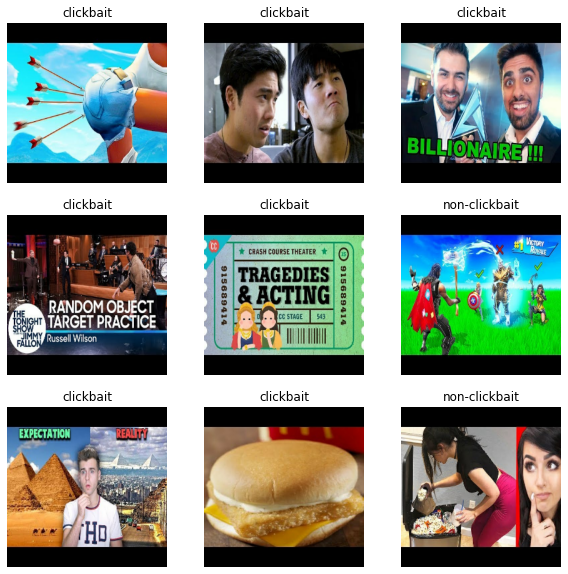

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in trains_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")